In [307]:
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
#Lecture des CSV
circuits = pd.read_csv('../data/circuits.csv', index_col=0, na_values=r'\N')
constructorResults = pd.read_csv('../data/constructor_results.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv('../data/constructors.csv', index_col=0, na_values=r'\N')
constructorStandings = pd.read_csv('../data/constructor_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv('../data/drivers.csv', index_col=0, na_values=r'\N')
driverStandings = pd.read_csv('../data/driver_standings.csv', index_col=0, na_values=r'\N')
lapTimes = pd.read_csv('../data/lap_times.csv')
pitStops = pd.read_csv('../data/pit_stops.csv')
qualifying = pd.read_csv('../data/qualifying.csv', index_col=0, na_values=r'\N')
races = pd.read_csv('../data/races.csv', na_values=r'\N')
results = pd.read_csv('../data/results.csv', index_col=0, na_values=r'\N')
seasons = pd.read_csv('../data/seasons.csv', index_col=0, na_values=r'\N')
status = pd.read_csv('../data/status.csv', index_col=0, na_values=r'\N')

In [309]:
#Couleur des constructeurs
constructor_color_map = {
    'Toro Rosso': '#0000FF',
    'Mercedes': '#6CD3BF',
    'Red Bull': '#1E5BC6',
    'Ferrari': '#ED1C24',
    'Williams': '#37BEDD',
    'Force India': '#FF80C7',
    'Virgin': '#c82e37',
    'Renault': '#FFD800',
    'McLaren': '#F58020',
    'Sauber': '#006EFF',
    'Lotus': '#FFB800',
    'HRT': '#b2945e',
    'Caterham': '#0b361f',
    'Lotus F1': '#FFB800',
    'Marussia': '#6E0000',
    'Manor Marussia': '#6E0000',
    'Haas F1 Team': '#B6BABD',
    'Racing Point': '#F596C8',
    'Aston Martin': '#2D826D',
    'Alfa Romeo': '#B12039',
    'AlphaTauri': '#4E7C9B',
    'Alpine F1 Team': '#2293D1'
}

In [310]:
# Formattage de certaines colonnes

drivers = drivers.rename(columns={'nationality': 'driverNationality', 'url': 'driverUrl'})
drivers['driverName'] = drivers['forename'] + ' ' + drivers['surname']

constructors = constructors.rename(
    columns={'name': 'constructorName', 'nationality': 'constructorNationality', 'url': 'constructorUrl'})

races.set_index('raceId', inplace=True)
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

pitStops = pitStops.rename(columns={'time': 'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x / 1000)

results['seconds'] = results['milliseconds'].apply(lambda x: x / 1000)

circuits = circuits.rename(
    columns={'name': 'circuitName', 'location': 'circuitLocation', 'country': 'circuitCountry', 'url': 'circuitUrl'})

In [311]:
#Dataframe central sur lequel nous allons nous appuyer
bigDF = pd.merge(results, races, left_on='raceId', right_index=True, how='left')
bigDF= pd.merge(bigDF, constructors, left_on='constructorId', right_index=True, how='left')
bigDF = pd.merge(bigDF, drivers, left_on='driverId', right_index=True, how='left')
bigDF = pd.merge(bigDF,circuits,left_on='circuitId',right_index=True,how='left')
bigDF

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,driverUrl,driverName,circuitRef,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl
resultId,,,,,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,...,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2,2,3.0,5,2.0,2,2,8.0,58,...,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,18,3,3,7.0,7,3.0,3,3,6.0,58,...,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,18,4,4,5.0,11,4.0,4,4,5.0,58,...,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
5,18,5,1,23.0,3,5.0,5,5,4.0,58,...,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,...,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,...,http://en.wikipedia.org/wiki/Kevin_Magnussen,Kevin Magnussen,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,...,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3.0,http://en.wikipedia.org/wiki/Yas_Marina_Circuit


C:\Users\Tom\AppData\Local\Temp\ipykernel_13124\1976187680.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



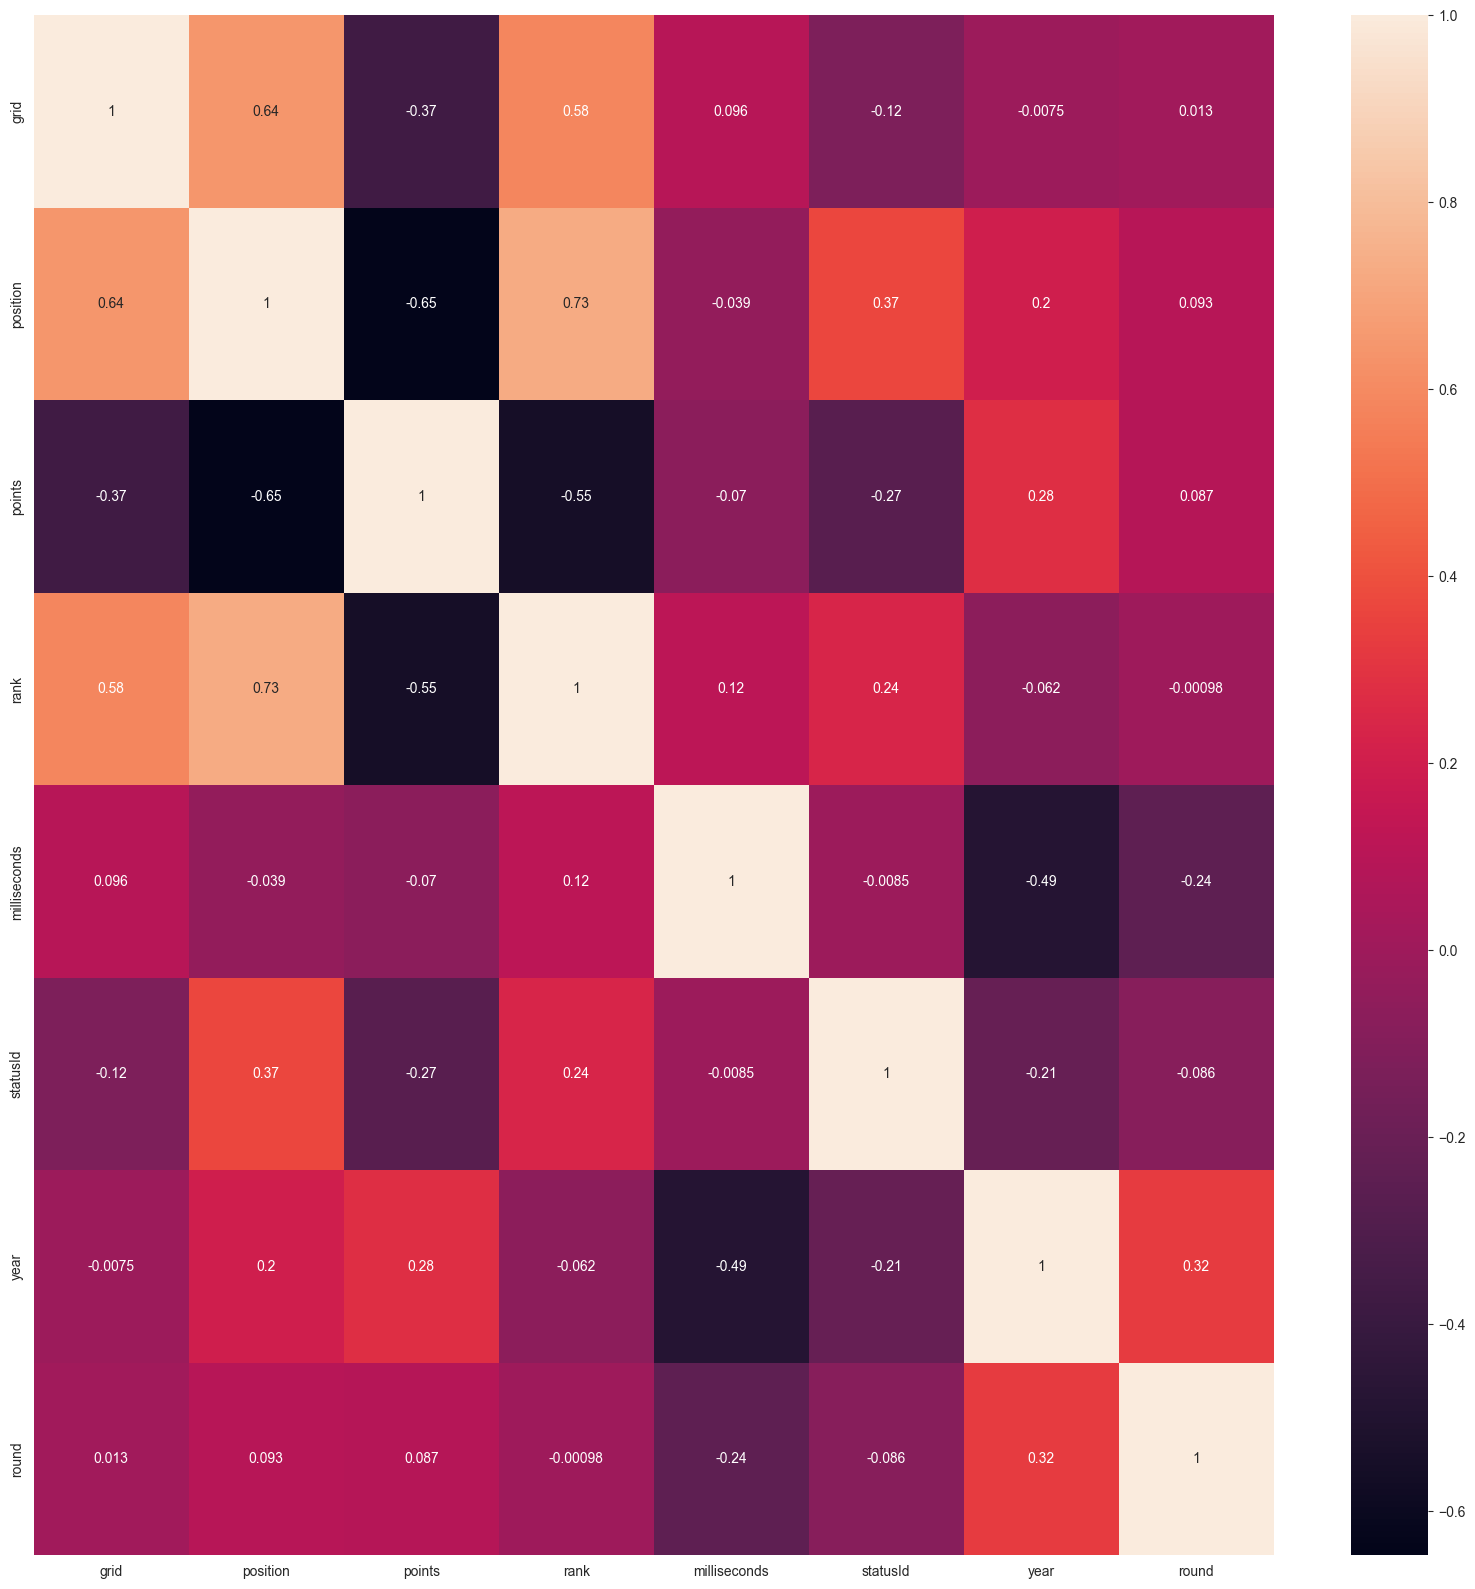

In [312]:
#Matrice de corrélation pour voir si nous pouvons trouver des hypothèses avec
dfCorr = bigDF[['grid', 'position', 'points', 'rank', 'milliseconds', 'statusId', 'year', 'round', 'name', 'date', 'sprint_time', 'constructorName', 'constructorNationality', 'driverName', 'driverNationality']]
plt.figure(figsize=(20, 20))
sns.heatmap(dfCorr.corr(method='pearson'), annot=True)
plt.show()

In [313]:
#Focus sur Lewis Hamilton et ses écuries
driver = 'Lewis Hamilton'
startYear = 2005
endYear = 2020
constructorsFocused = ['McLaren', 'Mercedes']

In [314]:
#Calcul des victoires par année de l'écurie Mercedes
dfConstructorsFocused = bigDF[(bigDF['constructorName'].isin(constructorsFocused)) & (bigDF['year'] >= startYear) & (bigDF['year'] <= endYear) & (bigDF['position'] == 1)]
dfConstructorsFocused = dfConstructorsFocused[['constructorName', 'year', 'driverName']]
dfConstructorsFocusedV2 = dfConstructorsFocused.groupby(['year', 'constructorName']).size().reset_index(name='winCounts')
dfMercedes = dfConstructorsFocusedV2[(dfConstructorsFocusedV2['constructorName'] == 'Mercedes')]
dfMcLaren = dfConstructorsFocusedV2[(dfConstructorsFocusedV2['constructorName'] == 'McLaren')]
dfConstructorsFocusedV2

,year,constructorName,winCounts
0,2005,McLaren,10
1,2007,McLaren,8
2,2008,McLaren,6
3,2009,McLaren,2
4,2010,McLaren,5
5,2011,McLaren,6
6,2012,McLaren,7
7,2012,Mercedes,1
8,2013,Mercedes,3
9,2014,Mercedes,16


In [350]:
#On remarque une augmentation des victoires à partir de 2012
fig = px.line(dfMercedes, x='year', y='winCounts', color='constructorName', color_discrete_map=constructor_color_map, title=f'Victoires de Mercedes {startYear} à {endYear}', width=1500)

fig.update_yaxes(title_text='Nombre de victoires')
fig.update_xaxes(title_text='Année')

fig.show()

In [316]:
#Calcul des victoires de Lewis Hamilton par année
dfLewis = dfConstructorsFocused[(dfConstructorsFocused['driverName'] == driver)]
dfLewis = dfLewis.groupby(['year', 'driverName']).size().reset_index(name='winsCount')
dfLewis


,year,driverName,winsCount
0,2007,Lewis Hamilton,4
1,2008,Lewis Hamilton,5
2,2009,Lewis Hamilton,2
3,2010,Lewis Hamilton,3
4,2011,Lewis Hamilton,3
5,2012,Lewis Hamilton,4
6,2013,Lewis Hamilton,1
7,2014,Lewis Hamilton,11
8,2015,Lewis Hamilton,10
9,2016,Lewis Hamilton,10


In [317]:
#Impact de Lewis Hamilton sur ses équipes durant sa carrière
fig = px.bar(dfConstructorsFocusedV2, x='year', y='winCounts', color='constructorName', color_discrete_map=constructor_color_map, title='Impact de Lewis Hamilton sur ses équipes')
fig.update_yaxes(nticks=int(dfConstructorsFocusedV2['winCounts'].max()))

fig.add_scatter(x=dfLewis['year'], y=dfLewis['winsCount'], mode='lines', line=dict(color='red'), name='Hamilton')
fig.update_xaxes(dtick='M1')

fig.show()

In [318]:
#On remarque qu'il y'a de moins en moins de pilotes par décennie
countingPilots = bigDF[['driverName', 'year']]
countingPilots['decade'] = countingPilots['year'].apply(lambda x: (x // 10) * 10)
countingPilots = countingPilots.drop_duplicates().groupby('decade')['driverName'].nunique().reset_index()
countingPilots

C:\Users\Tom\AppData\Local\Temp\ipykernel_13124\969510192.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,decade,driverName
0,1950,332
1,1960,219
2,1970,173
3,1980,115
4,1990,105
5,2000,71
6,2010,66
7,2020,30


In [349]:
#Analyse du nombre de pilotes par décennies
fig = px.line(countingPilots, x="decade", y='driverName', title='Nombre de pilotes par décennies de 1950 à 2020', width=1500)

fig.update_yaxes(title_text='Nombre de pilotes')
fig.update_xaxes(title_text='Décennie')

fig.show()

In [320]:
chosenYears = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [321]:
#Calcul de la longevité moyenne du paddock lors des années choisies
dfLongevity = bigDF[['driverName', 'date', 'year']]
dfLongevity['date'] = pd.to_datetime(dfLongevity['date'])

tmp = dfLongevity.groupby('driverName')['year'].agg(['min'])

dfLongevity = dfLongevity.merge(tmp, left_on='driverName', right_index=True)
dfLongevity['longevity'] = (dfLongevity['year'] - dfLongevity['min'])

dfLongevity.drop_duplicates(subset=['driverName', 'year'], inplace=True)
dfLongevity

dfLongevity = dfLongevity[(dfLongevity['year'].isin(chosenYears))]
dfLongevity = dfLongevity.groupby('year')['longevity'].mean().reset_index()
dfLongevity

C:\Users\Tom\AppData\Local\Temp\ipykernel_13124\969103376.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,longevity
0,1950,0.000000
1,1960,3.538462
2,1970,4.093023
3,1980,3.414634
4,1990,4.475000
5,2000,4.478261
6,2010,5.518519
7,2020,5.695652


In [322]:
#Evolution du nombre de pilotes suivant la longévité moyenne du paddock
bar_trace = go.Bar(x=countingPilots['decade'], y=countingPilots['driverName'], name='Nombre de pilotes')
line_trace2 = go.Scatter(x=dfLongevity['year'], y=dfLongevity['longevity'], mode='lines',name='Longevité moyenne', yaxis='y2')

fig = go.Figure(data=[bar_trace, line_trace2])

fig.update_layout(
    title="Evolution du nombre de pilotes suivant la longévité moyenne du paddock",
    yaxis2=dict(
        title='Age',
        overlaying='y',
        side='right',

    ),
    yaxis=dict(title='Nombre pilotes'),
    xaxis=dict(title='Décennie / Année')
)

fig.show()

In [323]:
#Les statuts étant considérés comme des accidents ou des dommages
statusFocused = [3,4,20,29,31,41,44,47,54,56,59,66,68,73,75,76,82,95,104,107,130,137]

In [324]:
#Nombre d'accidents et de dommages par an et par écurie
statusDF = pd.merge(bigDF, status, left_index=True, right_index=True, how='left')
statusDFrom2012 = statusDF[(statusDF['statusId'].isin(statusFocused)) & (statusDF['year'] >= 2012)]
statusDFrom2012 = statusDFrom2012[['constructorName', 'year', 'statusId']]
statusDFrom2012

,constructorName,year,statusId
resultId,,,
21244,Williams,2012,3
21247,Williams,2012,4
21248,Ferrari,2012,4
21252,Lotus F1,2012,4
21253,Force India,2012,4
...,...,...,...
25805,AlphaTauri,2022,130
25824,Haas F1 Team,2022,4
25825,McLaren,2022,4


In [325]:
statusDFByYear = statusDFrom2012.groupby("year").agg({'statusId' : 'size'}).reset_index()
statusDFByYear

,year,statusId
0,2012,58
1,2013,33
2,2014,36
3,2015,41
4,2016,44
5,2017,37
6,2018,40
7,2019,33
8,2020,27
9,2021,36


In [326]:
fig = px.bar(statusDFByYear, x='year', y='statusId', title='Nombre de dommages et accidents par saison avant et après arrivée des courses sprint')

fig.update_yaxes(title_text='Accidents / Dommages')
fig.update_xaxes(title_text='Année', nticks=20)

fig.show()

In [338]:
winByFerrari = bigDF[(bigDF['position'] == 1) & (bigDF['constructorName'] == 'Ferrari') & (bigDF['year'] >= 1990)]
winByFerrari = winByFerrari[['year', 'constructorName']]
winByFerrari = winByFerrari.groupby('year').agg(count = ('year', 'size'), constructor = ('constructorName', 'first')).reset_index()
winByFerrari

,year,count,constructor
0,1990,6,Ferrari
1,1994,1,Ferrari
2,1995,1,Ferrari
3,1996,3,Ferrari
4,1997,5,Ferrari
5,1998,6,Ferrari
6,1999,6,Ferrari
7,2000,10,Ferrari
8,2001,9,Ferrari
9,2002,15,Ferrari


In [346]:
fig = px.bar(winByFerrari, x='year', y='count', color='constructor', color_discrete_map=constructor_color_map, title='Victoires de Ferrari par année de 1990 à 2022', width=1500)

fig.update_yaxes(title_text='Nombre de victoires')
fig.update_xaxes(title_text='Années', nticks=40)


fig.show()

In [329]:
statusDFByYearFerrari = statusDF[(statusDF['constructorName'] == 'Ferrari') & (statusDF['year'] >= 1990)]
statusDFByYearFerrari = statusDFByYearFerrari.groupby('year').agg({'statusId' : 'size', 'constructorName' : 'first' }).reset_index()
statusDFByYearFerrari

,year,statusId,constructorName
0,1990,32,Ferrari
1,1991,32,Ferrari
2,1992,32,Ferrari
3,1993,32,Ferrari
4,1994,32,Ferrari
5,1995,34,Ferrari
6,1996,32,Ferrari
7,1997,34,Ferrari
8,1998,32,Ferrari
9,1999,32,Ferrari


In [330]:
fig = px.line(statusDFByYearFerrari, x='year', y='statusId', color='constructorName', color_discrete_map=constructor_color_map, title='Nombre de dommages et accidents par saison chez Ferrari')
fig.update_yaxes(title_text='Dommages / Accidents')
fig.update_xaxes(title_text='Années', nticks=40)
fig.show()

In [331]:
ferrarisDrivers = bigDF[(bigDF['constructorName'] == 'Ferrari') & (bigDF['year'] >= 1990)]
ferrarisDrivers = ferrarisDrivers[['driverName', 'year']]
ferrarisDrivers = ferrarisDrivers.drop_duplicates(subset='driverName')
print(ferrarisDrivers)

                    driverName  year
resultId                            
8               Kimi Räikkönen  2008
13                Felipe Massa  2008
744         Michael Schumacher  2006
1140        Rubens Barrichello  2005
3304              Eddie Irvine  1999
3488                 Mika Salo  1999
4723            Gerhard Berger  1995
4725                Jean Alesi  1995
5191             Nicola Larini  1994
6016              Ivan Capelli  1992
6474               Alain Prost  1991
6985         Gianni Morbidelli  1991
7028             Nigel Mansell  1990
7770               Luca Badoer  2009
7802      Giancarlo Fisichella  2009
20323          Fernando Alonso  2010
22540         Sebastian Vettel  2015
24207          Charles Leclerc  2019
24973             Carlos Sainz  2021


In [332]:
bins = [1990, 2006, 2021]
labels = ['1990-2005', '2006-2020']

ferrarisDrivers['year_group'] = pd.cut(ferrarisDrivers['year'], bins=bins, labels=labels, right=False)
ferrarisDrivers = ferrarisDrivers['year_group'].value_counts().reset_index()
ferrarisDrivers

,index,year_group
0,1990-2005,10
1,2006-2020,8


In [333]:
fig = px.pie(ferrarisDrivers, names='index', values='year_group', hole=0.6, title='Nombre de pilotes chez Ferrari de 1990 à 2020', width=500)
fig.update_layout(annotations=[dict(text='Pilotes', x=0.5, y=0.5, font_size=30, showarrow=False)])
fig.show()